In [1]:
import pymongo
import datetime
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats

# Load the csv file

In [2]:
# let's load the csv file and convert it into a DataFrame
referendum_df = pd.read_csv("data/EU-referendum-result-data.csv")
referendum_df.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,34176,53216,77,0,32,7,38,39.11,60.89,0.09
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,36708,47773,135,0,85,0,50,43.45,56.55,0.16
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,39348,54522,69,0,21,0,48,41.92,58.08,0.07
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,22151,57765,34,0,8,3,23,27.72,72.28,0.04
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [3]:
# To properly visualise the different columns it may be useful to use transpose():
referendum_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,372,373,374,375,376,377,378,379,380,381
id,108,109,112,113,110,111,184,185,186,187,...,319,49,50,51,52,65,66,67,68,69
Region_Code,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,...,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003
Region,East,East,East,East,East,East,East,East,East,East,...,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber
Area_Code,E06000031,E06000032,E06000033,E06000034,E06000055,E06000056,E07000008,E07000009,E07000010,E07000011,...,E07000169,E08000016,E08000017,E08000018,E08000019,E08000032,E08000033,E08000034,E08000035,E08000036
Area,Peterborough,Luton,Southend-on-Sea,Thurrock,Bedford,Central Bedfordshire,Cambridge,East Cambridgeshire,Fenland,Huntingdonshire,...,Selby,Barnsley,Doncaster,Rotherham,Sheffield,Bradford,Calderdale,Kirklees,Leeds,Wakefield
Electorate,120892,127612,128856,109897,119530,204004,80108,62435,71447,128486,...,65278,175809,217432,197623,396406,342817,149195,307081,543033,246096
ExpectedBallots,87474,84633,93948,79969,86136,158904,57871,48129,52653,99996,...,51641,122982,151254,137478,266954,228729,106005,217460,387730,175261
VerifiedBallotPapers,87469,84636,93939,79954,86136,158896,57860,48120,52649,99990,...,51639,122972,151246,137474,266951,228729,106008,217449,387730,175259
Pct_Turnout,72.35,66.31,72.9,72.75,72.06,77.89,72.22,77.08,73.69,77.82,...,79.1,69.95,69.56,69.56,67.34,66.72,71.05,70.8,71.39,71.17
Votes_Cast,87469,84616,93939,79950,86135,158894,57852,48124,52649,99990,...,51636,122972,151246,137470,266951,228727,106004,217428,387677,175155


# Preliminary exploration of the dataset

In [4]:
#Let's have a look at the different column names and their data types
print("The Referendum DataFrame columns and data types are: ")

referendum_df.dtypes

The Referendum DataFrame columns and data types are: 


id                           int64
Region_Code                 object
Region                      object
Area_Code                   object
Area                        object
Electorate                   int64
ExpectedBallots              int64
VerifiedBallotPapers         int64
Pct_Turnout                float64
Votes_Cast                   int64
Valid_Votes                  int64
Remain                       int64
Leave                        int64
Rejected_Ballots             int64
No_official_mark             int64
Voting_for_both_answers      int64
Writing_or_mark              int64
Unmarked_or_void             int64
Pct_Remain                 float64
Pct_Leave                  float64
Pct_Rejected               float64
dtype: object

From these results, we start perceiving that some columns might be more relevant than others for our analysis:

- **Region**, and **Region_Code** hold information about the small set of regions that conforms the UK and that might return some interesting information about vote patterns.
- **Electorate** is useful to investigate about vote patterns based on the number of people with voting rights. 
- **Pct Turnout** gives us information about how many people of those with voting right actually voted on the Referendum.
- **Remain**, **Leave**, **Pct_Remain**, and **Pct_Leave** give us absolute and relative figures on Remain and Leave votes received in each area.
- The rest of the columns give some information about absolute and relatives figures on votes rejected and accepted. Althought it may result interesting, I cannot see any real profound reason to investigate these columns.  

In [5]:
# Let's now have a look at the describe() method to check if we can learn something from it:
referendum_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,382,191.500000,110.418145,1.00,96.2500,191.500,286.7500,382.00
Electorate,382,121727.751309,97061.752860,1799.00,72523.7500,96425.500,141379.7500,1260955.00
ExpectedBallots,382,87904.429319,63611.874911,1424.00,54878.5000,72544.500,104436.5000,790647.00
VerifiedBallotPapers,382,87900.620419,63605.668481,1424.00,54877.5000,72544.000,104436.5000,790523.00
Pct_Turnout,382,73.754764,5.099413,56.25,70.2700,74.345,77.9050,83.64
Votes_Cast,382,87898.801047,63603.499333,1424.00,54875.5000,72544.500,104436.5000,790523.00
Valid_Votes,382,87832.416230,63554.624962,1424.00,54844.2500,72511.500,104332.0000,790149.00
Remain,382,42254.557592,35622.620732,803.00,23535.2500,33475.000,48245.5000,440707.00
Leave,382,45577.858639,31308.892098,621.00,28668.5000,37573.500,54137.5000,349442.00
Rejected_Ballots,382,66.384817,59.451306,0.00,33.2500,46.500,74.0000,614.00


- We observe how the mean values of Pct_Remain and Pct_Leave (47.01 and 52.98) are very approximate to the actual results of the Referendum reported by the Electorate Commission but not exacly similar. This happens because the method describe works by aggregating values on several percentages which, at the end, do not correspond with the percentage of the final count. 
- The mean value for the Pct_Turnout column is 73.75, which indicates a high turnout value in the Referendum (Almost 3 out of 4 British registered to vote went to the polls).
- From the describe data frame we observe that applying count() to every row would have resulted in quite useful information such as what is the total number of votes to Remain and Leave or how many people registered to vote and went to the polls. 

In [6]:
# Let's figure out how many people in total registered to vote and how many actually went to the polls

print("Out of a total of {:,} people registered to vote. {:,} Actually went to the polls.".format(referendum_df["Electorate"].sum(), 
      referendum_df["Votes_Cast"].sum()))
print("{:,} people registered to vote but never went to the polls".format(referendum_df["Electorate"].sum() - referendum_df["Votes_Cast"].sum()))

Out of a total of 46,500,001 people registered to vote. 33,577,342 Actually went to the polls.
12,922,659 people registered to vote but never went to the polls


In [7]:
# Let's have a look at the unique values for the Region column:
list(referendum_df["Region"].unique())

['East',
 'East Midlands',
 'London',
 'North East',
 'North West',
 'Northern Ireland',
 'Scotland',
 'South East',
 'South West',
 'Wales',
 'West Midlands',
 'Yorkshire and The Humber']

# Patterns in votes within regions

In [8]:
# Let's observe the pattern of total number of votes between regions
referendum_grouped = referendum_df[["Region", "Remain", "Leave"]].groupby("Region")
referendum_grouped_votes = referendum_grouped.aggregate("sum")
referendum_grouped_votes

,Remain,Leave
Region,,
East,1448616,1880367
East Midlands,1033036,1475479
London,2263519,1513232
North East,562595,778103
North West,1699020,1966925
Northern Ireland,440707,349442
Scotland,1661191,1018322
South East,2391718,2567965
South West,1503019,1669711


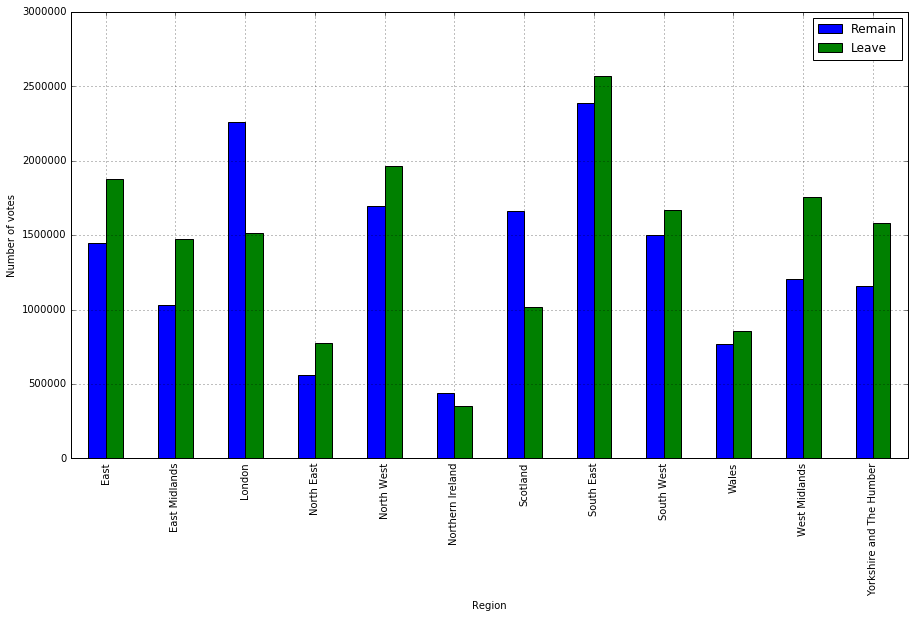

In [9]:
referendum_grouped_votes.plot(kind="bar", figsize=(15,8), grid=True)
plt.xlabel("Region")
plt.ylabel("Number of votes")

We observe from the above figure that the Leave vote won in 9 out of 12 regions. The Remain option won only in Scotland, London and Norther Ireland.

# Turnout rates

In [10]:
#Let's know have a look at the average turnout in the different regions
referendum_grouped_2 = referendum_df[["Region", "Pct_Turnout"]].groupby("Region")
referendum_grouped_turnout = referendum_grouped_2.aggregate("mean")
referendum_grouped_turnout

,Pct_Turnout
Region,
East,75.741702
East Midlands,75.452250
London,69.817273
North East,69.130833
North West,70.738974
Northern Ireland,62.690000
Scotland,68.620938
South East,77.050448
South West,77.504211


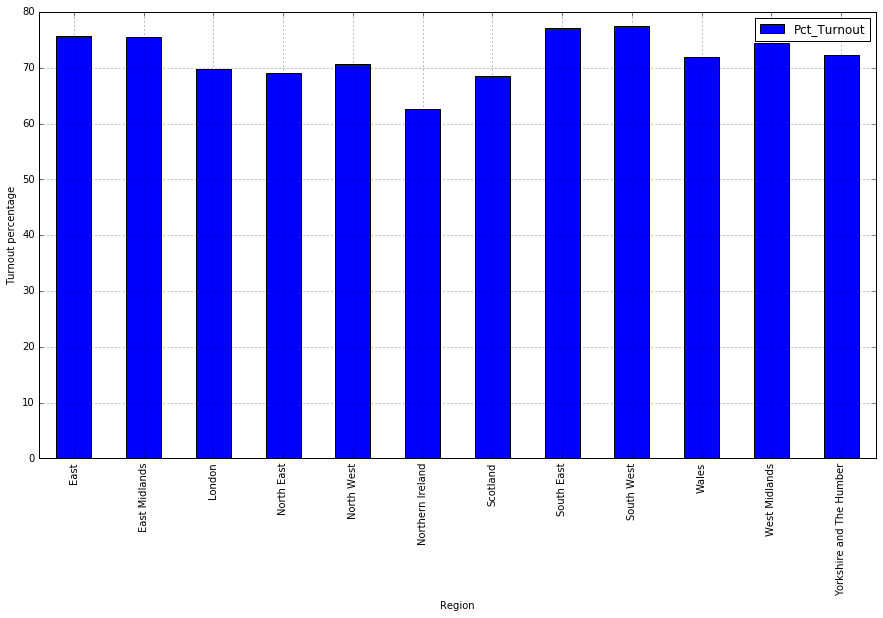

In [11]:
referendum_grouped_turnout.plot(kind="bar", figsize=(15,8), grid=True)

plt.xlabel("Region")
plt.ylabel("Turnout percentage")

We observe something interesting in the figure above. Although the turnout percentage is quite similar in every region, it seems that some of its lowest values are found in the regions where Leave won. Let's order the rows according to the turnout percentage and plot it again to confirm it.

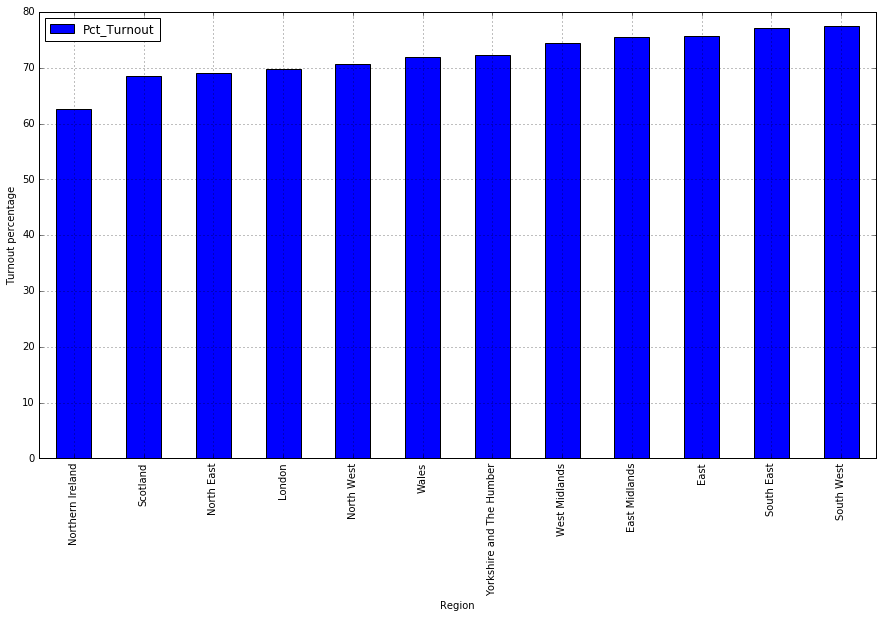

In [12]:
referendum_grouped_turnout.sort_values(by=["Pct_Turnout"], inplace=True)

referendum_grouped_turnout.plot(kind="bar", figsize=(15,8), grid=True)

plt.xlabel("Region")
plt.ylabel("Turnout percentage")

As I suspected, 3 out of the 4 regions with the lowest turnout percentage values are the ones where the Remain vote won over the Leave. 

In [13]:
#Let's merge both DataFrames to ease some further analysis

referendum_grouped_votes.reset_index(inplace=True)
referendum_grouped_turnout.reset_index(inplace=True)
referendum_votes_turnout = pd.merge(referendum_grouped_votes, referendum_grouped_turnout)

referendum_votes_turnout.set_index("Region",inplace=True)

referendum_votes_turnout

,Remain,Leave,Pct_Turnout
Region,,,
East,1448616,1880367,75.741702
East Midlands,1033036,1475479,75.452250
London,2263519,1513232,69.817273
North East,562595,778103,69.130833
North West,1699020,1966925,70.738974
Northern Ireland,440707,349442,62.690000
Scotland,1661191,1018322,68.620938
South East,2391718,2567965,77.050448
South West,1503019,1669711,77.504211


# Size of electorate and vote

Let's see if the population of the different regions has any effect on voting Leave of Remain. 

In [14]:
# First of all let's group the DataFrame by region selecting the Electorate column:
referendum_grouped = referendum_df[["Region", "Electorate"]].groupby("Region")
referendum_grouped_electorate = referendum_grouped.aggregate("sum")
referendum_grouped_electorate.head()

,Electorate
Region,
East,4398796
East Midlands,3384299
London,5424768
North East,1934341
North West,5241568


In [15]:
# For this analysis it will be more useful to work with percentages rather than absolute numbers. So let's
# group the data by region using the % columns:
referendum_grouped = referendum_df[["Region", "Pct_Leave" ,"Pct_Remain"]].groupby("Region")
referendum_grouped_pct = referendum_grouped.aggregate("mean")
referendum_grouped_pct

,Pct_Leave,Pct_Remain
Region,,
East,56.962128,43.037872
East Midlands,59.574500,40.425500
London,39.091515,60.908485
North East,59.479167,40.520833
North West,55.915128,44.084872
Northern Ireland,44.220000,55.780000
Scotland,39.136875,60.863125
South East,52.170000,47.830000
South West,52.379211,47.620789


In [16]:
# Now let's merge this DataFrame with out previous votes DataFrame
referendum_votes_electorate = pd.merge(referendum_grouped_electorate.reset_index(), referendum_grouped_pct.reset_index())
referendum_votes_electorate.set_index("Region", inplace=True)
referendum_votes_electorate

,Electorate,Pct_Leave,Pct_Remain
Region,,,
East,4398796,56.962128,43.037872
East Midlands,3384299,59.574500,40.425500
London,5424768,39.091515,60.908485
North East,1934341,59.479167,40.520833
North West,5241568,55.915128,44.084872
Northern Ireland,1260955,44.220000,55.780000
Scotland,3987112,39.136875,60.863125
South East,6465404,52.170000,47.830000
South West,4138134,52.379211,47.620789


In [17]:
referendum_votes_electorate.sort_values(by=["Electorate"], inplace=True)

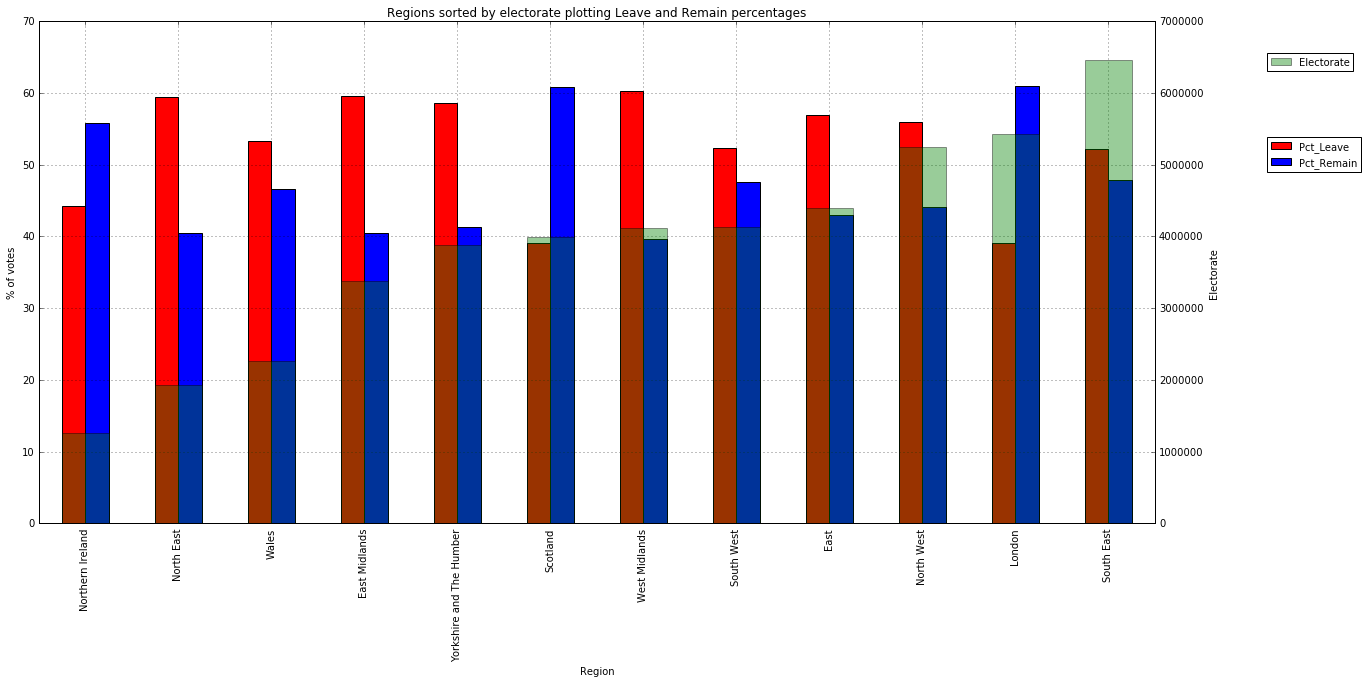

In [18]:
## TODO

fig = plt.figure()

votesAxes = fig.add_subplot(111)
referendum_votes_electorate[["Pct_Leave","Pct_Remain"]].plot.bar(grid=True,ax=votesAxes, color=['red','blue'],figsize=(20,9))
votesAxes.set_ylabel('% of votes')


electorateAxes = votesAxes.twinx()


referendum_votes_electorate["Electorate"].plot.bar(ax=electorateAxes, color='green', alpha=0.4 )
electorateAxes.set_ylabel("Electorate")

votesAxes.legend(loc=[1.1, 0.7], frameon=True, fontsize=10)
electorateAxes.legend(loc=[1.1, 0.9], frameon=True, fontsize=10)



plt.title("Regions sorted by electorate plotting Leave and Remain percentages")

From the previous plot is rather hard to hypothesize about a correlation between size of the electorate and vote for leave or remain. We can see from the plot that both the region with the smalles electorate (Northern Irenalnd) and the one with the second biggest electorate (London) voted Remain. Let´s check anyway if Pearson's *R*² tells us anything about a possible correlation between the size of the electorate and the option voted:

In [19]:
scipy.stats.pearsonr(referendum_df["Electorate"], referendum_df["Pct_Remain"])

(0.14877840392273259, 0.0035619607592649767)

The small p value suggest that the results are statistically significant but with a small correlation.

In [20]:
# Let's create a new column per row indicating the victory of Leave or Remain per Area.
# We will firts create a function to pupulate the new column

def winner_vote(row):
    if row["Pct_Remain"] > 50:
        return "Remain"
    else:
        return "Leave"

referendum_df["Vote"]= referendum_df.apply(winner_vote, axis=1)
referendum_df.head()

,id,Region_Code,Region,Area_Code,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,...,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Vote
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,53216,77,0,32,7,38,39.11,60.89,0.09,Leave
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,47773,135,0,85,0,50,43.45,56.55,0.16,Leave
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,54522,69,0,21,0,48,41.92,58.08,0.07,Leave
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,57765,34,0,8,3,23,27.72,72.28,0.04,Leave
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,44569,69,0,26,1,42,48.22,51.78,0.08,Leave


In [21]:
# Now let's do some grouping according to the Remain or Leave Victory to study other factors:
referendum_grouped = referendum_df[["Vote", "Pct_Turnout"]].groupby("Vote")
referendum_grouped_results = referendum_grouped.aggregate("mean")
referendum_grouped_results.head()


,Pct_Turnout
Vote,
Leave,74.240570
Remain,72.681092


In [22]:
# Let's group the data a new column to the dataframe to put the turnout percentages in 5% bins:

def bin_turnout(row):
    if 55 < row["Pct_Turnout"] <= 60:
        return "55 - 60"
    elif 60 < row["Pct_Turnout"] <= 65:
        return "60 - 65"
    elif 65 < row["Pct_Turnout"] <= 70:
        return "65 - 70"
    elif 70 < row["Pct_Turnout"] <= 75:
        return "70 - 75"
    elif 75 < row["Pct_Turnout"] <= 80:
        return "75 - 80"
    elif 80 < row["Pct_Turnout"] <= 85:
        return "80 - 85"
    
    
referendum_df["Bin_Turnout"] = referendum_df.apply(bin_turnout, axis= 1)
referendum_df.head().transpose()

,0,1,2,3,4
id,108,109,112,113,110
Region_Code,E12000006,E12000006,E12000006,E12000006,E12000006
Region,East,East,East,East,East
Area_Code,E06000031,E06000032,E06000033,E06000034,E06000055
Area,Peterborough,Luton,Southend-on-Sea,Thurrock,Bedford
Electorate,120892,127612,128856,109897,119530
ExpectedBallots,87474,84633,93948,79969,86136
VerifiedBallotPapers,87469,84636,93939,79954,86136
Pct_Turnout,72.35,66.31,72.9,72.75,72.06
Votes_Cast,87469,84616,93939,79950,86135


In [23]:
# Now let's group the table by this new bins:
referendum_grouped = referendum_df[["Pct_Remain", "Pct_Leave", "Bin_Turnout"]].groupby("Bin_Turnout")
referendum_grouped_bins = referendum_grouped.aggregate("mean")

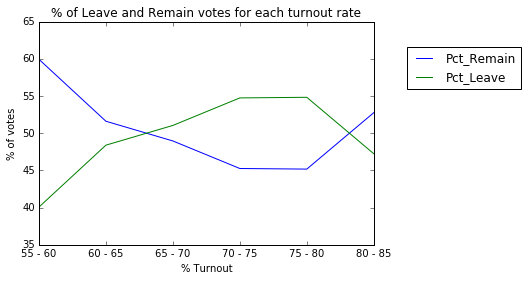

In [24]:
# And let's plot the % of leave and remain votes within this bins:

referendum_grouped_bins.plot(ylim=[35,65])
plt.legend(loc=[1.1, 0.7])
plt.title("% of Leave and Remain votes for each turnout rate")
plt.xlabel("% Turnout")
plt.ylabel("% of votes")

The plot is not very informative, since the percentages vary along the bins with no apparent correlation. We should be able to confirm this by performing Pearson's *R*²

In [25]:
scipy.stats.pearsonr(referendum_df["Pct_Turnout"], referendum_df["Pct_Remain"])

(-0.085768593473523752, 0.094145566746441214)

As we suspected, the p value is not statistically significant and the correlation is so small that is virtually inexistent.

In [26]:
# Here we will count how many areas in each Region voted leave or remain by majority
leave_remain_region = pd.crosstab(referendum_df["Region"],referendum_df["Vote"])
leave_remain_region

Vote,Leave,Remain
Region,,
East,42,5
East Midlands,38,2
London,5,28
North East,11,1
North West,32,7
Northern Ireland,0,1
Scotland,0,32
South East,43,24
South West,28,10


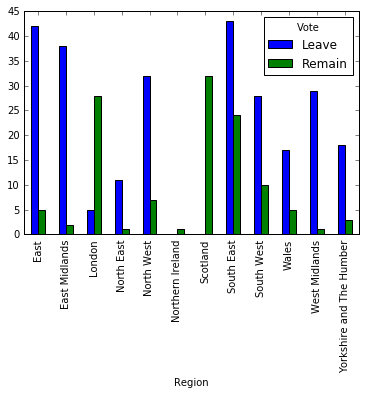

In [27]:
leave_remain_region.plot.bar()

In the cell below I am going to calculate the discrepancy between the most voted option and the least one in percentage. I will do this by applying a funcion to each row that will subtract the percentage of the winner option to the loser one.

In [28]:
def calculate_difference(row):
    a,b = row["Pct_Leave"], row["Pct_Remain"]
    return (max(a,b) - min(a,b))

referendum_df["Difference"] = referendum_df.apply(calculate_difference, axis=1)
referendum_df.T

,0,1,2,3,4,5,6,7,8,9,...,372,373,374,375,376,377,378,379,380,381
id,108,109,112,113,110,111,184,185,186,187,...,319,49,50,51,52,65,66,67,68,69
Region_Code,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,E12000006,...,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003,E12000003
Region,East,East,East,East,East,East,East,East,East,East,...,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber,Yorkshire and The Humber
Area_Code,E06000031,E06000032,E06000033,E06000034,E06000055,E06000056,E07000008,E07000009,E07000010,E07000011,...,E07000169,E08000016,E08000017,E08000018,E08000019,E08000032,E08000033,E08000034,E08000035,E08000036
Area,Peterborough,Luton,Southend-on-Sea,Thurrock,Bedford,Central Bedfordshire,Cambridge,East Cambridgeshire,Fenland,Huntingdonshire,...,Selby,Barnsley,Doncaster,Rotherham,Sheffield,Bradford,Calderdale,Kirklees,Leeds,Wakefield
Electorate,120892,127612,128856,109897,119530,204004,80108,62435,71447,128486,...,65278,175809,217432,197623,396406,342817,149195,307081,543033,246096
ExpectedBallots,87474,84633,93948,79969,86136,158904,57871,48129,52653,99996,...,51641,122982,151254,137478,266954,228729,106005,217460,387730,175261
VerifiedBallotPapers,87469,84636,93939,79954,86136,158896,57860,48120,52649,99990,...,51639,122972,151246,137474,266951,228729,106008,217449,387730,175259
Pct_Turnout,72.35,66.31,72.9,72.75,72.06,77.89,72.22,77.08,73.69,77.82,...,79.1,69.95,69.56,69.56,67.34,66.72,71.05,70.8,71.39,71.17
Votes_Cast,87469,84616,93939,79950,86135,158894,57852,48124,52649,99990,...,51636,122972,151246,137470,266951,228727,106004,217428,387677,175155


In [29]:
referendum_grouped = referendum_df[["Difference", "Pct_Remain", "Pct_Leave", "Region"]].groupby("Region")
referendum_grouped_difference = referendum_grouped.aggregate("mean")
referendum_grouped_difference

,Difference,Pct_Remain,Pct_Leave
Region,,,
East,18.809362,43.037872,56.962128
East Midlands,20.012000,40.425500,59.574500
London,28.500606,60.908485,39.091515
North East,19.191667,40.520833,59.479167
North West,15.420000,44.084872,55.915128
Northern Ireland,11.560000,55.780000,44.220000
Scotland,21.726250,60.863125,39.136875
South East,12.720896,47.830000,52.170000
South West,14.543684,47.620789,52.379211


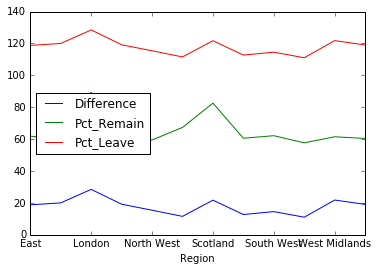

In [30]:
referendum_grouped_difference.plot(stacked=True)